In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the train data and print the first rows using head function
Traindf=pd.read_excel('Data_Train.xlsx')
Traindf.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [3]:
#read the test data and print the first rows using head function
Testdf=pd.read_excel('Data_Test.xlsx')

Testdf.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [4]:
Traindf["DATA"] = "train"
Testdf["DATA"] = "test"
Testdf["COST"]=0

In [5]:
#concat the train and test data and print using head function
foodcost=pd.concat([Traindf,Testdf])
foodcost.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,DATA
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,train
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,train
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,train
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,train
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,train


In [6]:
foodcost.shape
#lets check the number of rows and columns; there are 16921 rows and 10 columns

(16921, 10)

In [7]:
foodcost.duplicated().sum()
foodcost.drop_duplicates(keep='first', inplace=True)
foodcost.reset_index(inplace=True)
# check for duplicate records... didn't remove the duplicate records as it was bringing score down


In [8]:
foodcost.head()
#print using head function

,index,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,DATA
0,0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,train
1,1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,train
2,2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,train
3,3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,train
4,4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,train


In [9]:
foodcost.shape
#lets check the no of rows and columns; there are 19895 rows and 11 columns

(16895, 11)

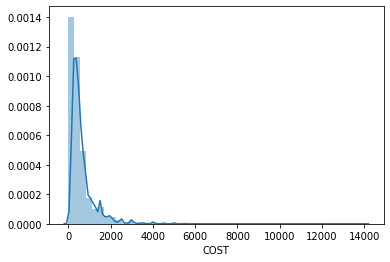

In [10]:
sns.distplot(foodcost['COST'])
#plot votes

In [11]:
foodcost.isnull().sum()
#check whether there are any null values 
#we can see that there are null values in city, locality, rating, votes

index               0
TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              147
LOCALITY          128
RATING              4
VOTES            1602
COST                0
DATA                0
dtype: int64

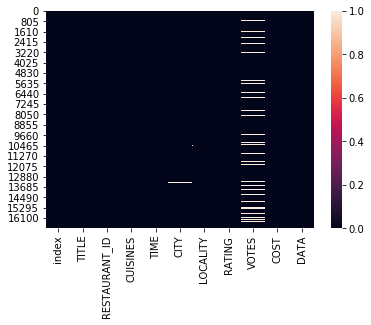

In [12]:
sns.heatmap(foodcost.isnull())
#checking null values using heatmap

In [13]:
foodcost.describe()

,index,RESTAURANT_ID,COST
count,16895.000000,16895.000000,16895.000000
mean,5280.342942,7765.922344,491.308139
std,3710.647936,4494.226728,612.933016
min,0.000000,0.000000,0.000000
25%,2112.000000,3869.500000,0.000000
50%,4225.000000,7750.000000,350.000000
75%,8445.500000,11672.000000,600.000000
max,12689.000000,15573.000000,14000.000000


#From the above statistical table we can understand: We can see that for each column we have the following functions

count- Number of non-null observations here all the columns contain  16895 entries.

mean- Mean of Values here mean of each column is found ie, mean of RATING column= 3.520947 , VOTES is 379.391773 etc

std- Standard Deviation of the Values here stnadard deviation for RATING	 is 0.909668 , VOTES is 808.915747 etc

min- Minimum value here it shows the min value for RATING	 is 1 , for VOTES is 0 etc

max- Maximum value it shows the max value for RATING	 as  3.400  , for VOTES is 40.00 etc

25%, 50%, and 75% - IQR values it shows percentile values at 25%,50% and 75% ; for RATING it is 3.4000 , 3.8000 and 4.000 respectively

In [14]:
for i in foodcost:
    print('unique values in ',i ,'is',foodcost[i].nunique())

unique values in  index is 12667
unique values in  TITLE is 123
unique values in  RESTAURANT_ID is 15574
unique values in  CUISINES is 5183
unique values in  TIME is 3295
unique values in  CITY is 450
unique values in  LOCALITY is 1636
unique values in  RATING is 32
unique values in  VOTES is 2075
unique values in  COST is 87
unique values in  DATA is 2


In [15]:
import re
def extract_closed(time):
    a = re.findall('Closed \(.*?\)', time)
    if a != []:
        return a[0]
    else:
        return 'NA'

foodcost['CLOSED'] = foodcost['TIME'].apply(extract_closed)
foodcost.head()


,index,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,DATA,CLOSED
0,0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200,train,NA
1,1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500,train,NA
2,2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800,train,NA
3,3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800,train,NA
4,4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300,train,NA


In [16]:
foodcost['TIME'] = foodcost['TIME'].str.replace(r'Closed \(.*?\)','')
#foodcost['TIME'] = foodcost['TIME'].str.replace(r'Closed \(.*?\)','')

In [17]:
foodcost['RATING'] = foodcost['RATING'].str.replace('NEW', '1')
foodcost['RATING'] = foodcost['RATING'].str.replace('-', '1').astype(float)

In [18]:
foodcost['VOTES'] = foodcost['VOTES'].str.replace(' votes', '').astype(float)

In [19]:
#fill the null values
foodcost['CITY'].fillna('Missing', inplace=True)  
foodcost['LOCALITY'].fillna('Missing', inplace=True)  
foodcost['RATING'].fillna(3.8, inplace=True)  
foodcost['VOTES'].fillna(0.0, inplace=True)

In [20]:
foodcost['COST'] = foodcost['COST'].astype(float)

In [21]:
foodcost.head()

,index,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,DATA,CLOSED
0,0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0,train,NA
1,1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0,train,NA
2,2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800.0,train,NA
3,3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800.0,train,NA
4,4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300.0,train,NA


In [22]:
foodcost['TITLE'].nunique()

123

In [23]:
foodcost['CUISINES'].nunique()

5183

In [24]:
#merge columns
calc_mean = foodcost.groupby(['CITY'], axis=0).agg({'RATING': 'mean'}).reset_index()
calc_mean.columns = ['CITY','CITY_MEAN_RATING']
foodcost = foodcost.merge(calc_mean, on=['CITY'],how='left')

calc_mean = foodcost.groupby(['LOCALITY'], axis=0).agg({'RATING': 'mean'}).reset_index()
calc_mean.columns = ['LOCALITY','LOCALITY_MEAN_RATING']
foodocost = foodcost.merge(calc_mean, on=['LOCALITY'],how='left')

In [25]:
foodcost.head()

,index,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,DATA,CLOSED,CITY_MEAN_RATING
0,0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0,train,NA,3.417241
1,1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0,train,NA,3.584408
2,2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800.0,train,NA,3.584408
3,3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800.0,train,NA,3.697132
4,4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300.0,train,NA,3.697132


In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf1 = TfidfVectorizer(ngram_range=(1, 1), lowercase=True)
foodcost_title = tf1.fit_transform(foodcost['TITLE'])
foodcost_title = pd.DataFrame(data=foodcost_title.toarray(), columns=tf1.get_feature_names())

tf2 = TfidfVectorizer(ngram_range=(1, 1), lowercase=True)
foodcost_cuisines = tf2.fit_transform(foodcost['CUISINES'])
foodcost_cuisines = pd.DataFrame(data=foodcost_cuisines.toarray(), columns=tf2.get_feature_names())

tf3 = TfidfVectorizer(ngram_range=(1, 1), lowercase=True)
foodcost_city = tf3.fit_transform(foodcost['CITY'])
foodcost_city = pd.DataFrame(data=foodcost_city.toarray(), columns=tf3.get_feature_names())

tf4 = TfidfVectorizer(ngram_range=(1, 1), lowercase=True)
foodcost_locality = tf4.fit_transform(foodcost['LOCALITY'])
foodcost_locality = pd.DataFrame(data=foodcost_locality.toarray(), columns=tf4.get_feature_names())

tf5 = TfidfVectorizer(ngram_range=(1, 1), lowercase=True)
foodcost_time = tf5.fit_transform(foodcost['TIME'])
foodcost_time = pd.DataFrame(data=foodcost_time.toarray(), columns=tf5.get_feature_names())

In [27]:
foodcost.head()


,index,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST,DATA,CLOSED,CITY_MEAN_RATING
0,0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49.0,1200.0,train,NA,3.417241
1,1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30.0,1500.0,train,NA,3.584408
2,2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221.0,800.0,train,NA,3.584408
3,3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24.0,800.0,train,NA,3.697132
4,4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165.0,300.0,train,NA,3.697132


In [28]:
foodcost = pd.concat([foodcost,foodcost_title, foodcost_cuisines, foodcost_city, foodcost_locality, foodcost_time], axis=1) 
foodcost.drop(['TITLE', 'CUISINES', 'CITY', 'LOCALITY', 'TIME'], axis=1, inplace=True)

In [29]:
foodcost.head()


,index,RESTAURANT_ID,RATING,VOTES,COST,DATA,CLOSED,CITY_MEAN_RATING,bakery,bar,...,closed,fri,hours,mon,not,sat,sun,thu,tue,wed
0,0,9438,3.6,49.0,1200.0,train,NA,3.417241,0.0,0.00000,...,0.0,0.0,0.0,0.144361,0.0,0.0,0.150415,0.0,0.0,0.0
1,1,13198,4.2,30.0,1500.0,train,NA,3.584408,0.0,0.80821,...,0.0,0.0,0.0,0.198819,0.0,0.0,0.207156,0.0,0.0,0.0
2,2,10915,3.8,221.0,800.0,train,NA,3.584408,0.0,0.00000,...,0.0,0.0,0.0,0.191246,0.0,0.0,0.199265,0.0,0.0,0.0
3,3,6346,4.1,24.0,800.0,train,NA,3.697132,0.0,0.00000,...,0.0,0.0,0.0,0.185294,0.0,0.0,0.193064,0.0,0.0,0.0
4,4,15387,3.8,165.0,300.0,train,NA,3.697132,0.0,0.00000,...,0.0,0.0,0.0,0.218254,0.0,0.0,0.227406,0.0,0.0,0.0


In [30]:
foodcost = pd.get_dummies(foodcost, columns=['CLOSED'], drop_first=True)

In [31]:
foodcost.head()

,index,RESTAURANT_ID,RATING,VOTES,COST,DATA,CITY_MEAN_RATING,bakery,bar,beverage,...,CLOSED_Closed (Mon-Thu),CLOSED_Closed (Mon-Tue),CLOSED_Closed (Sat),CLOSED_Closed (Sat-Sun),CLOSED_Closed (Sun),CLOSED_Closed (Thu-Sun),CLOSED_Closed (Tue),CLOSED_Closed (Wed),CLOSED_Closed (Wed-Sun),CLOSED_NA
0,0,9438,3.6,49.0,1200.0,train,3.417241,0.0,0.00000,0.0,...,0,0,0,0,0,0,0,0,0,1
1,1,13198,4.2,30.0,1500.0,train,3.584408,0.0,0.80821,0.0,...,0,0,0,0,0,0,0,0,0,1
2,2,10915,3.8,221.0,800.0,train,3.584408,0.0,0.00000,0.0,...,0,0,0,0,0,0,0,0,0,1
3,3,6346,4.1,24.0,800.0,train,3.697132,0.0,0.00000,0.0,...,0,0,0,0,0,0,0,0,0,1
4,4,15387,3.8,165.0,300.0,train,3.697132,0.0,0.00000,0.0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
foodcost.shape
#using shape, we can see that there are 16895 rows and 2287 columns

(16895, 2287)

In [33]:
foodcost = foodcost[foodcost['COST'].isnull()!=True]

In [34]:
foodcost.shape

(16895, 2287)

In [35]:
foodcost['COST'] = np.log1p(foodcost['COST'])

In [36]:
#splitting the data
X = foodcost.drop(labels=['COST','DATA'], axis=1)
y = foodcost['COST'].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [37]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((12671, 2285), (12671,), (4224, 2285), (4224,))

Model Algorithm and Prediction

In [38]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split,cross_val_score

In [42]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
EN=ElasticNet()
KNR=KNeighborsRegressor()
DTR=DecisionTreeRegressor(random_state=63)
ABR=AdaBoostRegressor(random_state=63)
GBR=GradientBoostingRegressor(random_state=63)

In [43]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('GradientBoostingRegressor',GBR))

In [44]:
from sklearn.metrics import r2_score,mean_squared_error

Model=[]
R2_score=[]
cvs=[]
MSE=[]
for name,model in models:
    print('*********************************',name,'*********************************')
    print('\n',model)
    Model.append(name)
    model.fit(X_train,y_train)
    pre=model.predict(X_test)
    r2=r2_score(y_test,pre)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pre)
    print("Mean_Squared_Error =",mse)
    MSE.append(round(mse,3))
    score= cross_val_score(model,X,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(round(score,3))
    print('\n')

********************************* LinearRegression *********************************

 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2_score =  0.16642808267247
Mean_Squared_Error = 6.360876223311251
Cross_Val_Score =  -3282324732055.3726


********************************* Lasso *********************************

 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  0.24193901052030942
Mean_Squared_Error = 5.7846623951302245
Cross_Val_Score =  -6.547220225898123


********************************* Ridge *********************************

 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)
R2_score =  0.22000799516260516
Mean_Squared_Error = 5.952015050902434
Cross_Val_Score =  -6.5176829662321385


******************

In [45]:
from math import sqrt 

from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

In [46]:
br = BaggingRegressor(base_estimator=None, n_estimators=30, max_samples=0.9, max_features=1.0, bootstrap=True, 
                      bootstrap_features=True, oob_score=True, warm_start=False, n_jobs=1, random_state=42, verbose=1)
br.fit(X_train, y_train)
y_pred_br = br.predict(X_test)
print('RMSE:', sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_br))))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s finished


RMSE: 2.148592381311285


In [47]:
rf = RandomForestRegressor(n_estimators=40, criterion='mse', max_depth=None, min_samples_split=4, min_samples_leaf=1, 
                           min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, 
                           min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, 
                           random_state=42, verbose=1, warm_start=False)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('RMSE:', sqrt(mean_squared_log_error(np.exp(y_test), np.exp(y_pred_rf))))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RMSE: 2.083670616852836


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished


In [48]:
rf.score(X_train,y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.3s finished


0.8875919661542502

In [49]:
pred=rf.predict(X_test)
print("predicted cost",pred)
print("actual cost",y_test)
#print the predicted and actual cost

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished


predicted cost [5.83190329 6.27780241 3.01291834 ... 5.77352022 2.54242366 3.88865775]
actual cost [5.70711026 6.55250789 0.         ... 5.70711026 7.24494155 5.30330491]


In [50]:
#save the model
from sklearn.externals import joblib
joblib.dump(rf,"model_Food_cost.pkl")

['model_Food_cost.pkl']